In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm 
import warnings
warnings.filterwarnings("ignore")

# Regressão Linear

Com regressão linear podemos prever valoes onde duas ou mais variaveis tendem a ter um relação. É importante sempre se perguntar se existe uma relação matemática entre as duas variáveis e se ela pode ser medida, usar essa relação matematica entre essas variáveis para realizar previsões é o intúito da regressão linear. 

In [12]:
data = pd.read_csv('data\cars.csv')
print('N º de Linhas: ', data.shape[0])
print('N º de Colunas: ', data.shape[1])
print('Colunas: ',list(data.columns))
data = data.drop(['Unnamed: 0'],axis=1)
print('Colunas: ',list(data.columns))

N º de Linhas:  50
N º de Colunas:  3
Colunas:  ['Unnamed: 0', 'speed', 'dist']
Colunas:  ['speed', 'dist']


## Correlação 

A relação matemática que falamos anteriormente pode ser chamada de correlação, essa correlação pode mostrar a força e a direção da relação entre variáveis.
Uma correlação pode variar entre 1 e -1, quanto mais proximo de 1 e -1 ela tem a caracteristica de correlação forte, e quando mais proximo de zero tem uma correlação fraca. 

Coeficiente de determinação (R²), este calculo pode ser feito pra verificar o quanto uma variavel pode ser descrita após sua correlação, exemplo: Digamos que temos duas variáveis, Idade e custo, calculamos o coeficiente de determinação, e deu 86%, logo 86 porecento das variavel dependente custo pode ser explicada pela idade. 

In [3]:
x = data.iloc[:,1].values
y = data.iloc[:,0].values

In [4]:
corr = np.corrcoef(x,y)
print('Correlação entre variaveis Speed e Dist: ', round(corr[1][0],2))

Correlação entre variaveis Speed e Dist:  0.81


## Previsão

A principal forma de realizar previsão é calcular a reta de regresão ou reta de melhor ajuste, como ela é uma linha contínua no espaço tempo das variáveis, podemos utliza-la pra realizar previsões.  
Como a linha é construída ?

Calculamos a interseção n eio Y, calculamos também a inclinação.

PREVISAO = interseção + ( inclinação * valor)



In [5]:
x=x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

Podemos calcular onde a reta de regressão vai passaar no eixo y, vejamos.

In [6]:
print('Interceção da reta regressão com o eixo "y": ',round(modelo.intercept_,2))

Interceção da reta regressão com o eixo "y":  8.28


Calculando também a inclinação.

In [7]:
print('Inclinação da reta de regressão: ',round(modelo.coef_[0],2))

Inclinação da reta de regressão:  0.17


Criando gráfico com reta de regressão

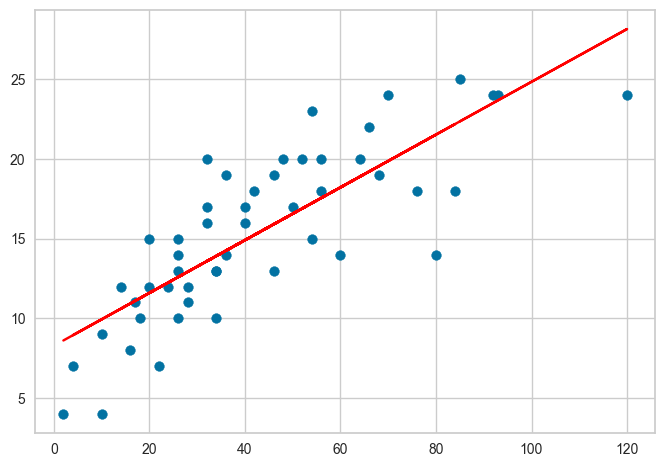

In [8]:
plt.scatter(x,y)
plt.plot(x,modelo.predict(x),color='red')

Prevendo a velocidae para uma distância qualquer.

In [9]:
print('Previsão da velocidade se ele levou 22 para parar: ',round(modelo.predict([[22]])[0],2))

Previsão da velocidade se ele levou 22 para parar:  11.93


## Resíduos

Residuo é a diferença entre a reta de melhor ajuste e o valor real.

Residuo = reta_regressão - calor_real 

Ela pode ser tanto positiva como negativa, caso o valor real esteja acima da reta de regressão o valor do resisuo será positivo, caso contrário, o valor será negativo.

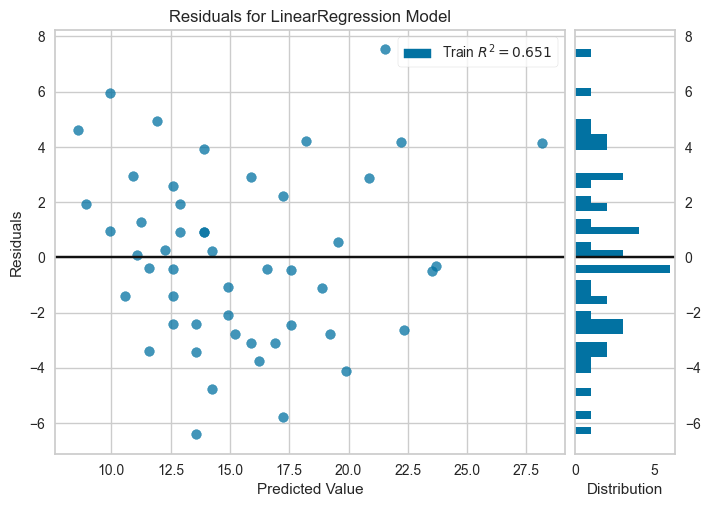

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
vis = ResidualsPlot(modelo)
vis.fit(x,y)
vis.poof()

É importante que os residuos estejam dispersos na plotagem, pois quando identifica uma certa padronização tende-se que o modelo esteja sobreajustado(*overfiting*). 

## Condições para Regressão

1) A correlação deve ser de moderada a forte, tanto positiva quanto negativa 
2) Avaiar o coeficiente de determinação, sendo maior que 7 um ótimo modelo e menor que 3 é um péssimo modelo. 
3) Os resíduos devem ser próximo a distribuições normais. (Histogramas, Diagrma de normalidade, teste de Shapiro-Wilk)

## Regressão Linear Múltipla

Na regressão linear múltipla eu tenho duas ou mais variáveis explicativas para prever uma variável alvo. 
* Nem sempre que temos muitas variaveis explicativas devemos ter o melhor modelo.

Analisar cada X com Y:

* Gerar gráficos de disperssão 
* Procurar redundâncias, são variaveis que explicam da mesma forma o valor de Y

Avaliar o R² :

* Lembrando que o R² é o percentual de variação da variável de resposta que é explicada pelo modelo
* Quando se colocam mais variáveis no modelo, a tendência é que R² aumenta, mesmo que a adição a vriável não aumente a precisão do modelo
* Para isso, ultiliza-se o R² ajustado, que ajusta a variação do modelo de acordo com o número  de variáveis  independentes  que é incluída  no modelo.
* R² ajustado vai ser sempre < que R² 

Colinariedade e Parcimonia :

* Colinariedade, é quando duas variáveis independentes que são correlacionadas.
* Parciomonia, é quando não colocamos variáveis que não melhorem o modelo em nada: criar modelos parcimonios.

In [18]:
data = pd.read_csv(r'C:\Users\Usuário\Documents\Vinícius\Study_Models\data\mt_cars.csv')
print('N º de Linhas: ', data.shape[0])
print('N º de Colunas: ', data.shape[1])
print('Colunas: ',list(data.columns))
data = data.drop(['Unnamed: 0'],axis=1)
print('Colunas: ',list(data.columns))

N º de Linhas:  32
N º de Colunas:  12
Colunas:  ['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
Colunas:  ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']


Estamos querendo prever o consumo(*data.iloc[:0]*) a partir da cilindrada (*data.iloc[:2]*)

In [37]:
x = data.iloc[:,2].values
y = data.iloc[:,0].values
corr = np.corrcoef(x,y)
print('Correlação entre variaveis Consumo e Cilindrada: ', round(corr[1][0],2))
x = x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(x,y)
print('R²:' ,round(modelo.score(x,y),2))
print('Prevendo a autonomia de um veículo com 200 cilindradas: ',round(modelo.predict([[200]])[0],2))

Correlação entre variaveis Consumo e Cilindrada:  -0.85
R²: 0.72
Prevendo a autonomia de um veículo com 200 cilindradas:  21.36


Agora iremos calcular a mesma regressão mas agora com mais atrivutos explicativos em relação a nossa variável alvo *Consumo*

In [61]:
x1 = data.iloc[:,1:4].values
y1 = data.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(x1,y1)
print('R²:' ,round(modelo2.score(x1,y1),2))
print('Prevendo a autonomia de um veículo com 4 cilindros ,200 cilindradas e 100 ... : ',modelo2.predict(np.array([4,200,100]).reshape(1,-11))[0])


R²: 0.77
Prevendo a autonomia de um veículo com 4 cilindros ,200 cilindradas e 100 ... :  24.039688865826932


# Regressão Logística 

Imaginemos um problema, 

"Quanto mais o candidato de um determinado partido arrecada, maior a chance dele seguir eleito" 

Podemos construir um modelo que pode prever se o candidato pode ser eleito ou não com base em quanto investe na camanha ? Logo podemos imaginar que a previsão dessa pergunta só pode ser sim ou não, um valor lógico. Desta forma podemos ultilizar o Modelo de Regressão Logistica para trabalhar com esse problema. 

A regressão logistica é semelhante a regressão linear, porém  a variável de resposta é binária 1 ou 0, as condições binárias são calculadas a partir de probabilidade, também podemos ter modelos simples ou múltiplos. 

A formulação da formula da regressão logistica é caracterizada pela junção da função da regressão linear -> *y=b0+b1 * X* e a formula da função sigmoide -> *1/1+e^-y*, assim temos a formula da regressão logistica -> 

*ln(1/1+e^-y) =  b0+b1 * x*

Essa função tende a suavizar a reta de regressão entre dois campos 0 e 1. 

É interesante ressaltar que na regressão logistica podemos ver a probabilidade da condição ser possivel ou não, trazendo para nosso exemplo, podemos ver a probabilidade de um canddidato ser eleito ou não. 

In [16]:
data = pd.read_csv('data\Eleicao.csv',sep=';')
print('N º de Linhas: ', data.shape[0])
print('N º de Colunas: ', data.shape[1])
print('Colunas: ',list(data.columns))
# data = data.drop(['Unnamed: 0'],axis=1)
# print('Colunas: ',list(data.columns))

N º de Linhas:  47
N º de Colunas:  3
Colunas:  ['CANDIDATO', 'SITUACAO', 'DESPESAS']


In [22]:
data.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [23]:
data.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


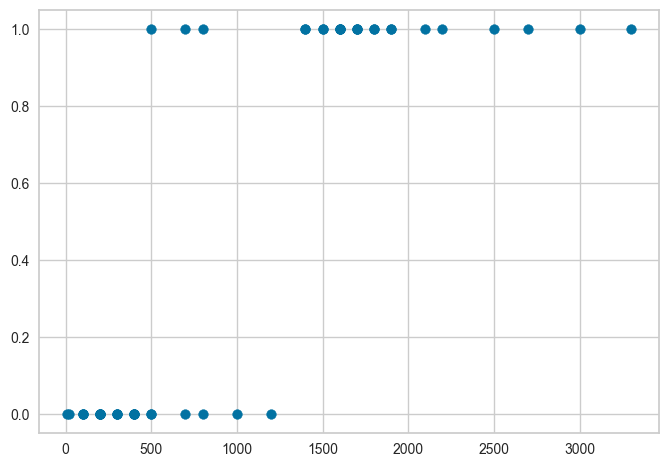

In [25]:
plt.scatter(data.DESPESAS,data.SITUACAO)

In [19]:
print('Correlação entre variaveis Speed e Dist: ', round(np.corrcoef(data.DESPESAS,data.SITUACAO)[1][0],2))

Correlação entre variaveis Speed e Dist:  0.81


In [35]:
x = data.iloc[:,2].values
x = x[:,np.newaxis]
y = data.iloc[:,1].values

In [39]:
modelo = LogisticRegression()
modelo.fit(x,y)
print('Inclinação da reta de regressão: ',modelo.coef_[0][0])
print('Interceção da reta de regressão: ',modelo.intercept_[0])
print('R²:' ,round(modelo.score(x,y),2))

Inclinação da reta de regressão:  0.004983644150212222
Interceção da reta de regressão:  -4.602872166414405
R²: 0.89


Abaixo temos uma forma visual de como a função sigmoide suavida dentre os dois campos a reta de regressão.

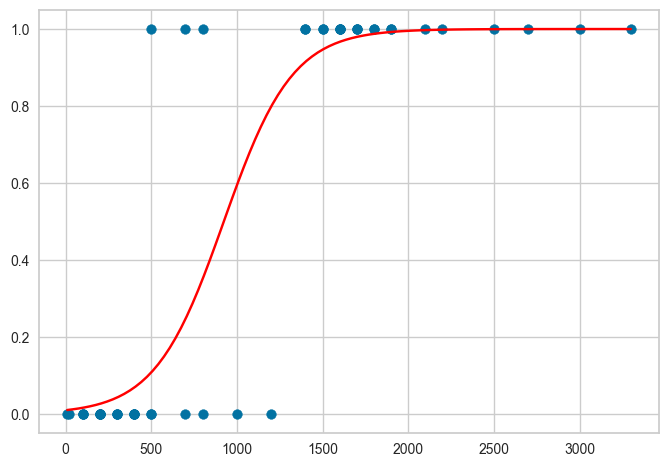

In [49]:
plt.scatter(x,y)
x_teste = np.linspace(10,3300,100)
r = 1/(1+np.exp(-(x_teste * modelo.coef_ + modelo.intercept_).ravel()))
plt.plot(x_teste, r, color='red')

In [50]:
data_prev = pd.read_csv('data/NovosCandidatos.csv', sep=';')
data_prev.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [61]:
desp = data_prev.iloc[:,1].values
desp = desp.reshape(-1,1)
previsoes = modelo.predict(desp)
print('Previsão de possivel candidaturas para os candidatos da tabela acima: \n')
data_prev['ELEITO'] = previsoes

for i in range(0,len(data_prev)): 
    print('Candidato: ',data_prev.CANDIDATO[i],'Eleito:', data_prev.ELEITO[i] )

Previsão de possivel candidaturas para os candidatos da tabela acima: 

Candidato:  A Eleito: 0
Candidato:  B Eleito: 0
Candidato:  C Eleito: 0
Candidato:  D Eleito: 0
Candidato:  E Eleito: 0
Candidato:  F Eleito: 1
Candidato:  G Eleito: 1


# ARIMA 

Existem diversas técnicas para realizar previsão de séries temporais, algumas ultilizam redes neurais artificiais e etc. Arima é um modelo clássico para séries temporais, ela requer que os dados sejam estácionários, que são aqueles dados que flutuam em uma mesma média e uma mesma variância. Caso os dados não sejam estácionários podemos ultilizar técnicaas para tranformar esses dados, uma das técnicas bastante utilizada é a diferenciação.

O ARIMA é composto por três elementos:

* AR (p) -> Autoregressivo, avalia as relações entre os periodos (lags): autocorrelação.
* I (d) -> Integrated, aplica a diferênciação, se necessária.
* MA (q)-> Moving Avenrage, avalia erros entre periodos e extrai estes erros. 

Como eu posso definir os parametros (p,d,q) do meu modelo ? 
Buscamos minimizar os índices de avaliação gerados pelo modelo (AIC/AICc e BIC) e tentamos testar todas as combinações possíveis.E para isso existe o Auto.ARIMA(), que testa as diferentes combinações possíveis, assim minimizando os indices de avaliação e tendo um melhor modelo. 

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
base = pd.read_csv('data\AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Series temporais 

In [9]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


Convertendo a coluna Month para datetime 

In [11]:
dateparse = lambda dates: datetime.strptime(dates,"%Y-%m")
base = pd.read_csv('data/AirPassengers.csv',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [12]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [15]:
timeseries = base['#Passengers']


Month
1949-02-01    118
Name: #Passengers, dtype: int64

Diversas formas de verificar uma série temporal

In [22]:
print(timeseries['1949-02'])
print('-'*35)
print(timeseries[datetime(1949,2,1)])
print('-'*35)
print(timeseries['1950-01-01':'1950-07-31'])
print('-'*35)
print(timeseries[:'1950-07-31'])
print('-'*35)
print(timeseries['1950'])
print('-'*35)
print(timeseries.index.max())
print('-'*35)
print(timeseries.index.min())


Month
1949-02-01    118
Name: #Passengers, dtype: int64
-----------------------------------
118
-----------------------------------
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
-----------------------------------
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64
-----------------------------------
Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int6

Vizualização completa

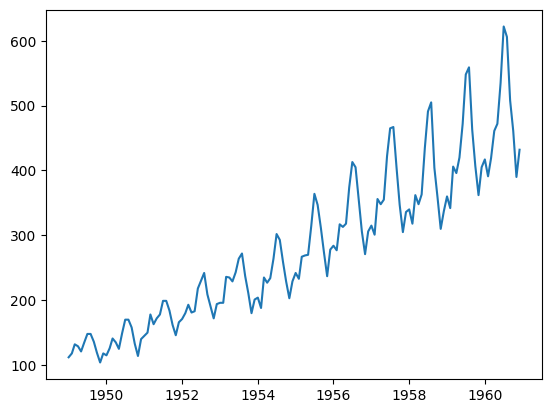

In [23]:
plt.plot(timeseries)

Vizualização por ano

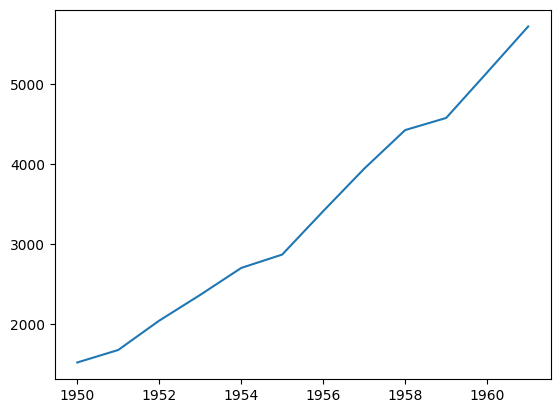

In [24]:
ts_ano = timeseries.resample('A').sum()
plt.plot(ts_ano)

Vizualização por mês

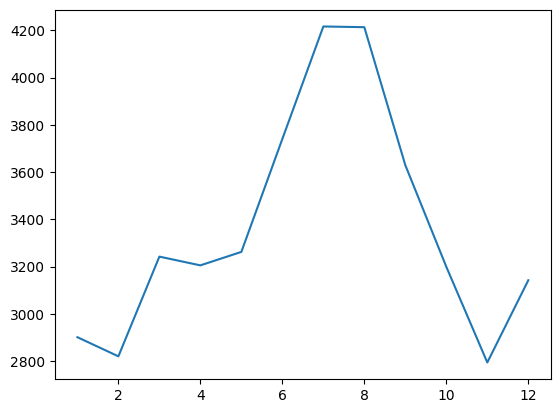

In [25]:
ts_mes = timeseries.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

Vizualização entre datas

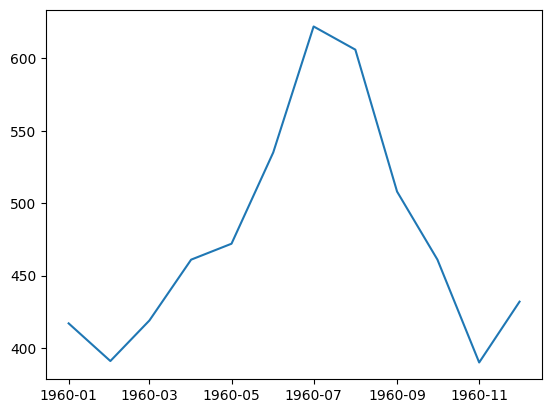

In [26]:
ts_data = timeseries['1960-01-01':'1960-12-01']
plt.plot(ts_data)

## Decomposição de séries temporais 

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

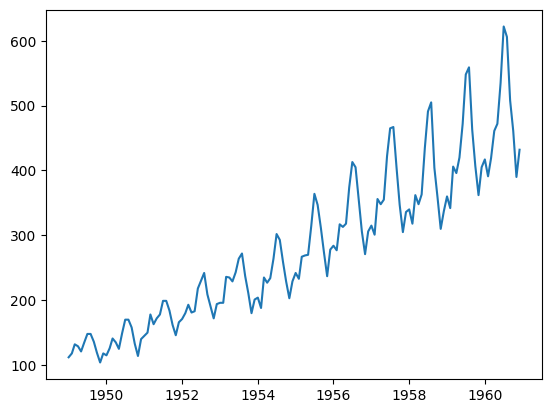

In [30]:
plt.plot(timeseries)

In [31]:
decomposi = seasonal_decompose(timeseries)

Tendencia

In [32]:
tendencia = decomposi.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

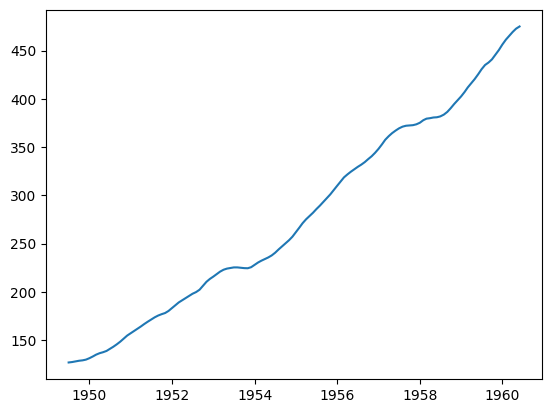

In [35]:
plt.plot(tendencia)

Sazonalidade

In [33]:
sazonal = decomposi.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

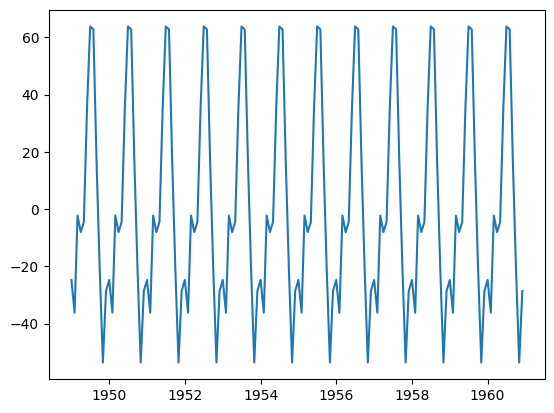

In [36]:
plt.plot(sazonal)

Residuos

In [44]:
resid = decomposi.resid
resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

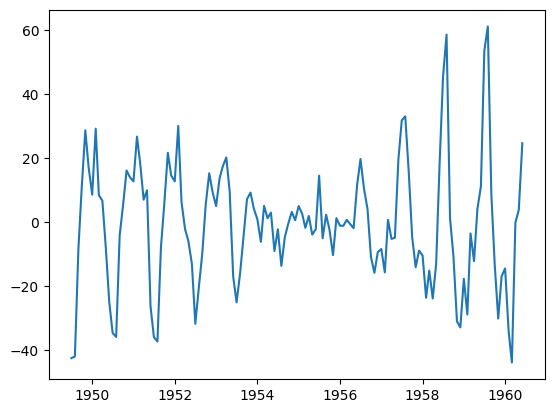

In [45]:
plt.plot(resid)

Gráficos gerais

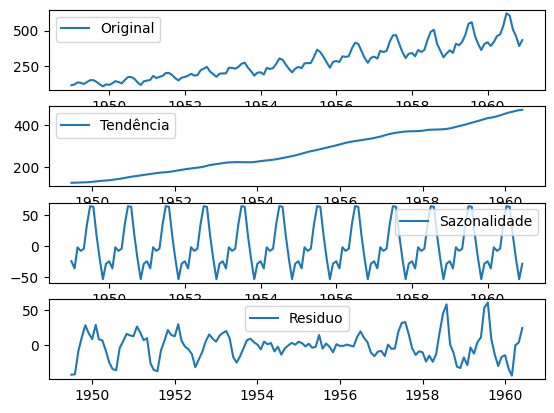

In [48]:
plt.subplot(4,1,1)
plt.plot(timeseries,label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(tendencia,label='Tendência')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(sazonal,label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(resid,label='Residuo')
plt.legend(loc='best')

## Model Arima

In [49]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
from pmdarima.arima import auto_arima


In [51]:
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


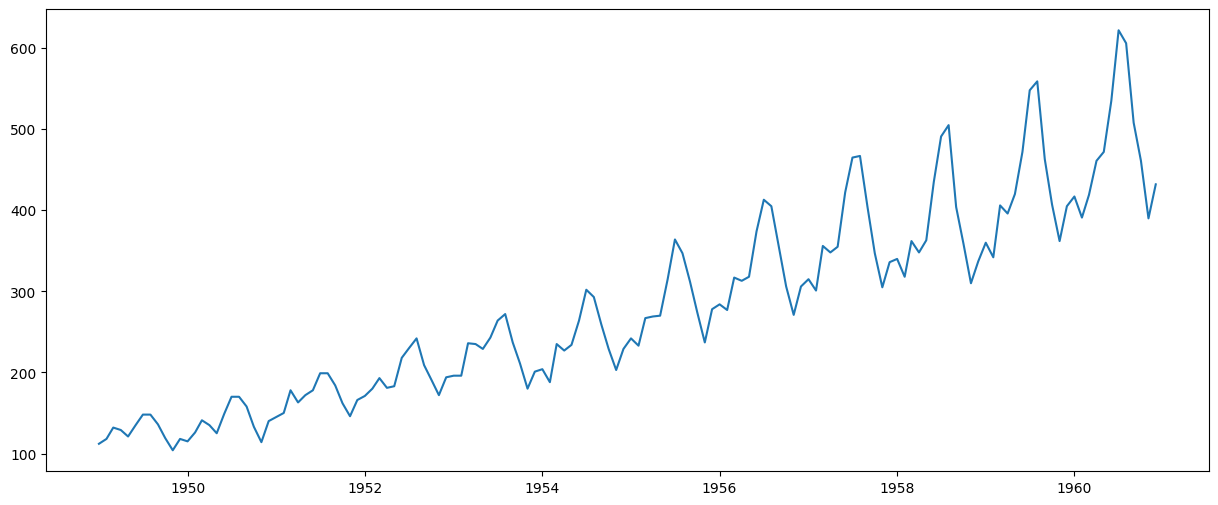

In [52]:
plt.plot(base)

In [56]:
stepwize_model = auto_arima(base,start_P=1,start_q=1,start_d=0,max_p=6,max_q=6,m=12,seasonal=True, trace=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.32 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.37 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.42 sec
 ARIM

In [63]:
print(stepwize_model.aic())

1012.9907964724457


In [66]:
train = base.loc['1949-01-01':'1959-12-01']
test = base.loc['1960-01-01':]

In [67]:
print(len(train))

132


In [68]:
print(len(test))

12


In [78]:
stepwize_model.fit(train)
future_forecast = stepwize_model.predict(n_periods=12)

In [79]:
future_forecast

1960-01-01    420.252126
1960-02-01    398.476476
1960-03-01    461.923281
1960-04-01    450.707257
1960-05-01    474.018030
1960-06-01    537.912103
1960-07-01    612.216868
1960-08-01    623.562296
1960-09-01    520.172065
1960-10-01    462.332461
1960-11-01    412.953807
1960-12-01    453.775856
Freq: MS, dtype: float64

In [82]:
future_forecast = pd.DataFrame(future_forecast,test.index,columns=['#Passengers'])

In [83]:
future_forecast

,#Passengers
Month,
1960-01-01,420.252126
1960-02-01,398.476476
1960-03-01,461.923281
1960-04-01,450.707257
1960-05-01,474.018030
1960-06-01,537.912103
1960-07-01,612.216868
1960-08-01,623.562296
1960-09-01,520.172065


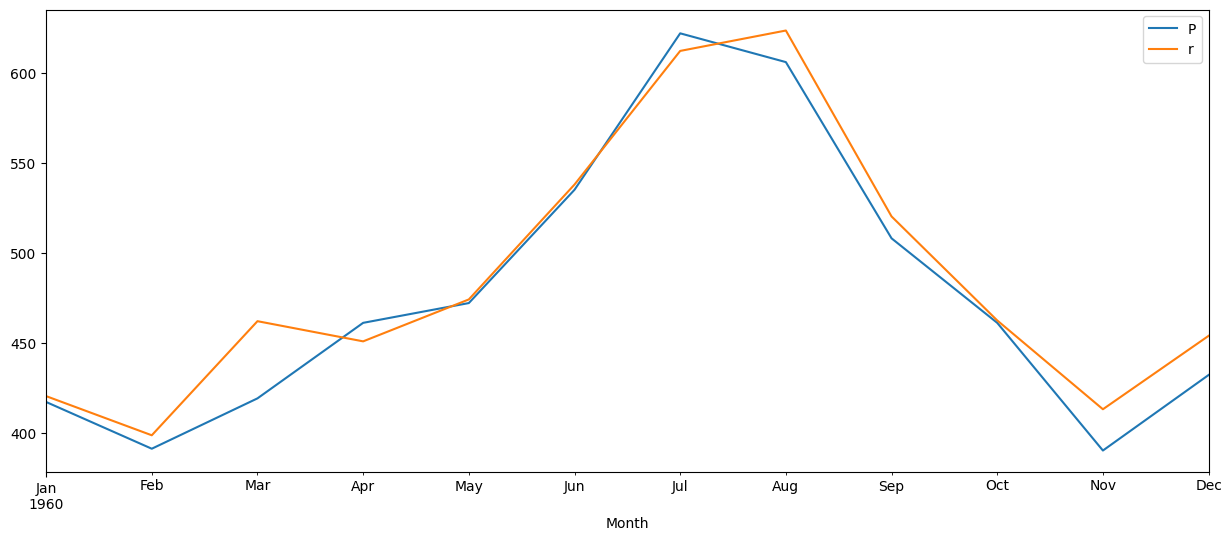

In [89]:
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot: xlabel='Month'>

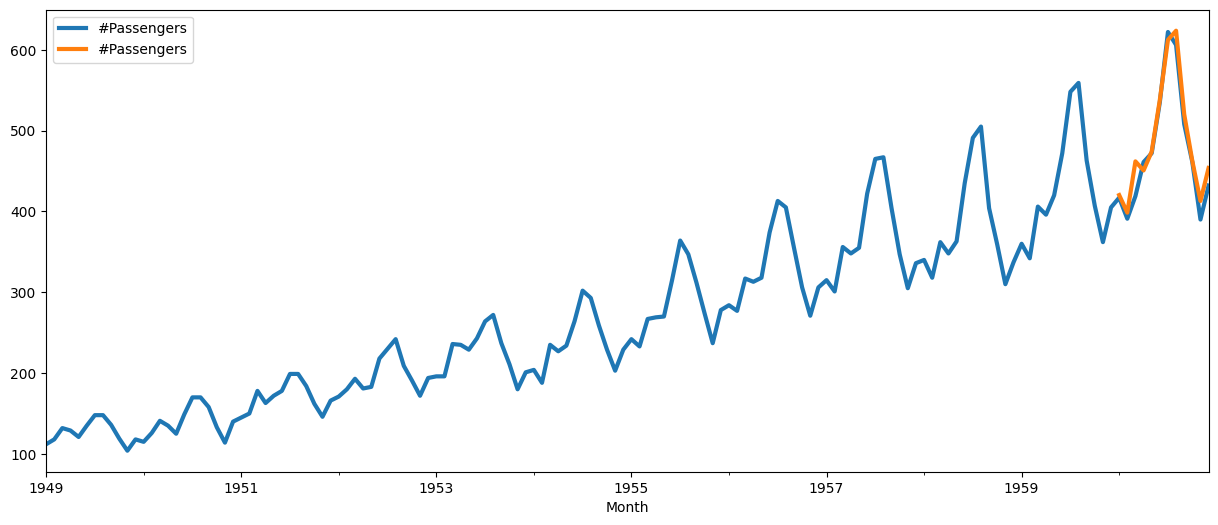

In [90]:
pd.concat([base,future_forecast],axis=1).plot(linewidth=3)

# Naive Bayes 

O Naive Bayes é um classificador baseado no terorema de Bayes que considera as probabilidades de forma independente.

In [118]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

No exemplo abaixo iremos classificar entre bons e mals pagadores 

In [119]:
data =  pd.read_csv('data/Credit.csv')
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [136]:
previsores = data.iloc[:,0:20].values
classe = data.iloc[:,20].values

Tranformando os atributos categoricos em atributos numericos, precisamos criar um objeto para cada atributo cateogirco, pois na sequencia o processo de encoding novamente para o registro de teste, se forem usados objetos diferentes, o número atribuído  a cada valor poderá  ser diferente, oq deiará o código inconsistente. 

In [137]:
previsores

array([['<0', 6, "'critical/other existing credit'", ..., 1, 'yes',
        'yes'],
       ['0<=X<200', 48, "'existing paid'", ..., 1, 'none', 'yes'],
       ["'no checking'", 12, "'critical/other existing credit'", ..., 2,
        'none', 'yes'],
       ...,
       ["'no checking'", 12, "'existing paid'", ..., 1, 'none', 'yes'],
       ['<0', 45, "'existing paid'", ..., 1, 'yes', 'yes'],
       ['0<=X<200', 45, "'critical/other existing credit'", ..., 1,
        'none', 'yes']], dtype=object)

In [138]:

for i in range(0, len(data.columns)-1):
    if data[data.columns[i]].dtypes == np.int64 or data[data.columns[i]].dtypes == np.float64:
        print('Valor númerico')
    else:
        print('Valor ',data.columns[i],' sendo tranformado')
        previsores[:,i] = LabelEncoder().fit_transform(previsores[:,i])

Valor  checking_status  sendo tranformado
Valor númerico
Valor  credit_history  sendo tranformado
Valor  purpose  sendo tranformado
Valor númerico
Valor  savings_status  sendo tranformado
Valor  employment  sendo tranformado
Valor númerico
Valor  personal_status  sendo tranformado
Valor  other_parties  sendo tranformado
Valor númerico
Valor  property_magnitude  sendo tranformado
Valor númerico
Valor  other_payment_plans  sendo tranformado
Valor  housing  sendo tranformado
Valor númerico
Valor  job  sendo tranformado
Valor númerico
Valor  own_telephone  sendo tranformado
Valor  foreign_worker  sendo tranformado


In [139]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

Dividindo a base de dados entre treino e teste *(30% e 70%)*

In [140]:
X_train, X_test, y_train, y_test = train_test_split(previsores,classe,test_size=0.3,random_state=0)

In [141]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

GaussianNB()

In [142]:
prediction = NaiveBayes.predict(X_test)
prediction

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [143]:
confusion = confusion_matrix(y_test ,prediction)
confusion

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [144]:
taxa_acerto = accuracy_score(y_test,prediction)
print('Taxa de acerto', taxa_acerto)
print('Taxa de erro: ', round(1 - taxa_acerto,2))

Taxa de acerto 0.71
Taxa de erro:  0.29


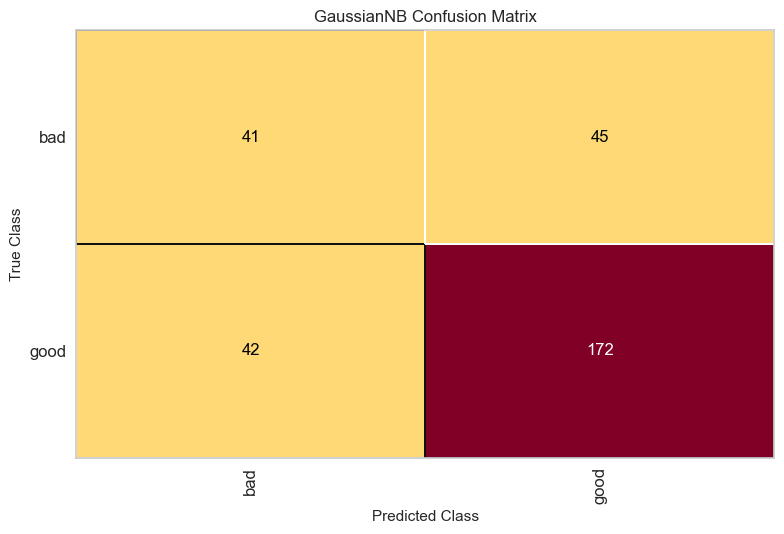

<AxesSubplot: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [145]:
v = ConfusionMatrix(GaussianNB())
v.fit(X_train,y_train)
v.fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()


In [146]:
data_new = pd.read_csv('data/NovoCredit.csv')
data_new.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [154]:
data = data_new.iloc[:,0:20].values

for i in range(0, len(data_new.columns)):
    if data_new[data_new.columns[i]].dtypes == np.int64 or data_new[data_new.columns[i]].dtypes == np.float64:
        print('Valor númerico')
    else:
        print('Valor ',data_new.columns[i],' sendo tranformado')
        data[:,i] = LabelEncoder().fit_transform(data[:,i])


Valor  checking_status  sendo tranformado
Valor númerico
Valor  credit_history  sendo tranformado
Valor  purpose  sendo tranformado
Valor númerico
Valor  savings_status  sendo tranformado
Valor  employment  sendo tranformado
Valor númerico
Valor  personal_status  sendo tranformado
Valor  other_parties  sendo tranformado
Valor númerico
Valor  property_magnitude  sendo tranformado
Valor númerico
Valor  other_payment_plans  sendo tranformado
Valor  housing  sendo tranformado
Valor númerico
Valor  job  sendo tranformado
Valor númerico
Valor  own_telephone  sendo tranformado
Valor  foreign_worker  sendo tranformado


In [155]:
data

array([[0, 12, 0, 0, 804, 0, 0, 4, 0, 0, 4, 0, 38, 0, 0, 1, 0, 1, 0, 0]],
      dtype=object)

In [156]:
NaiveBayes.predict(data)


array(['good'], dtype='<U4')